# Neural Networks and 2x2 matrices

In this session we will try to approximate a 2-by-2 matrix with a small neural network using $\varphi=\text{ReLU}(x)=\text{max}\lbrace x,0\rbrace$ (Rectified linear units, applied component-wise) as nonlinear activation function.

A small 16-parameter neural net with ReLU-nonlinearity in the first layer, no nonlinearity in the second one can represent a 2-by-2 matrix exactly.



In this exercise we want to employ this net to approximate $A_\varepsilon$ (direct operator) and $A_\varepsilon^{-1}$ (inverse operator) for 

$$A_\varepsilon = \begin{bmatrix}
    1  &  1 \\
    1  &  1 + \varepsilon \\
\end{bmatrix}
$$

and $\varepsilon = 10^0, 10^{-1}, 10^{-2}, 10^{-3},...$

### Exercise
**a)** For fixed $\epsilon > 0$ and $\sigma > 0$ generate a data set $(x_i, y_i)$ with $x_i \sim \mathcal{N}(0, 1)$ and $y_i^\delta = A_\varepsilon x_i + \sigma \eta_i$, $\eta_i \sim \mathcal{N}(0,1)$ for $i=1,...,10^3$. Create two plots, one containing the vectors $x_i$ and the other the vectors $y_i^\delta$.

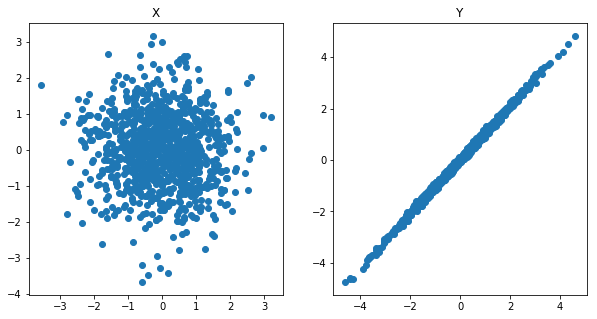

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


eps = 0.1
sigma = 0.01

A = np.array([[1, 1], [1, 1+eps]])

X = np.random.normal(size=(2, 1000))
Y = np.dot(A, X) + sigma * np.random.normal(size=(2, 1000))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('X')
plt.scatter(X[0,:], X[1,:])

plt.subplot(1, 2, 2)
plt.title('Y')
plt.scatter(Y[0,:], Y[1,:]);

**b)** For each value of $\varepsilon$ generate the data set and split it as in the previous exercises into training and validation set. Then train the network with the previously described architecture to approximate $A_\varepsilon$. Create one plot with all the validation error curves corresponding to the different values of $\varepsilon$.

Training for eps=1.0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 8         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Training for eps=0.1...
Training for eps=0.01...
Training for eps=0.001...


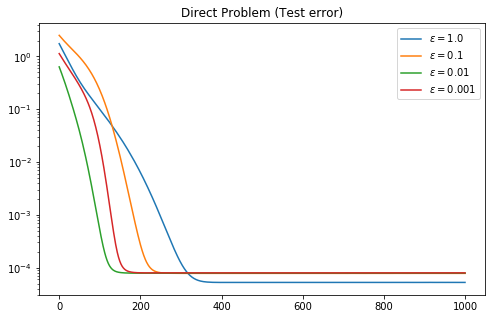

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam


sigma = 0.01
X = np.random.normal(size=(2, 1000))

plt.figure(figsize=(8,5))

for i, eps in enumerate([1e0, 1e-1, 1e-2, 1e-3]):
    print('Training for eps={}...'.format(eps))
    A = np.array([[1, 1], [1, 1 + eps]])
    Y = np.dot(A, X) + sigma * np.random.normal(size=(2, 1000))
    
    # in order to be able to compare results corresponding to y-values with different magnitudes we should scale the data
    # this also makes the training faster
    # for the method 'scale' the features are the columns so we need to transpose the data
    Y = scale(Y.T).T

    # the network also interpret features as columns, all the data must be transposed
    X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.5)

    model = Sequential()
    model.add(Dense(input_dim=2, units=4, use_bias=False))
    model.add(Dense(units=2, use_bias=False))

    model.compile(loss='mse', optimizer=adam(0.001))
    
    if i == 0:
        model.summary()
    
    h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=100, verbose=0)
    plt.plot(h.history['val_loss'], label=r'$\varepsilon={}$'.format(eps))
    
plt.title('Direct Problem (Test error)')
plt.yscale('log')
plt.legend();

**c)** Do the same for $A_\varepsilon^{-1}$.

Training for eps=1.0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 8         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Training for eps=0.1...
Training for eps=0.01...
Training for eps=0.001...


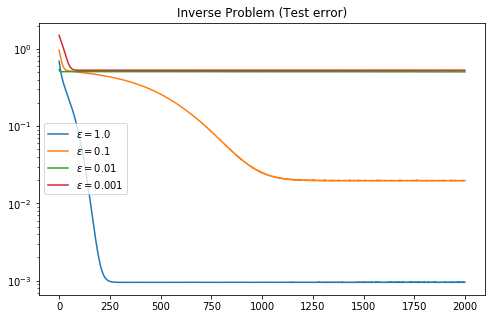

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam


sigma = 0.01
X = np.random.normal(size=(2, 1000))

plt.figure(figsize=(8,5))

for i, eps in enumerate([1e0, 1e-1, 1e-2, 1e-3]):
    print('Training for eps={}...'.format(eps))
    A = np.array([[1, 1], [1, 1 + eps]])
    Y = np.dot(A, X) + sigma * np.random.normal(size=(2, 1000))
    
    Y = scale(Y.T).T

    # !! FOR THIS PART THE ONLY THING WE NEED TO DO IS TO INVERT X AND Y IN THE NEXT LINE
    X_train, X_test, Y_train, Y_test = train_test_split(Y.T, X.T, test_size=0.5)

    model = Sequential()
    model.add(Dense(input_dim=2, units=4, use_bias=False))
    model.add(Dense(units=2, use_bias=False))

    model.compile(loss='mse', optimizer=adam(0.001))
    
    if i == 0:
        model.summary()
    
    h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2000, batch_size=100, verbose=0)
    plt.plot(h.history['val_loss'], label=r'$\varepsilon={}$'.format(eps))
    
plt.title('Inverse Problem (Test error)')
plt.yscale('log')
plt.legend();